# Time Series Analysis ARIMA (Rolling statistic + ADCF test)
#Using Air Passengers dataset 
https://www.kaggle.com/rakannimer/air-passengers

OR https://www.kaggle.com/martinfox1987/example-wp-log-peyton-manningcsv


In [41]:
import numpy as np
import pandas as pd  # for data analysis and for data processing part
import matplotlib.pylab as plt # For data visualization
%matplotlib inline
from matplotlib.pylab import rcParams # to define the size of plot window
rcParams['figure.figsize'] = 10,6

In [42]:
dataset = pd.read_csv("AirPassengers.csv")   # download link : https://www.kaggle.com/rakannimer/air-passengers/download
#parse string to dateTime format
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format = True)  # here you will have index as month 
indexedDataset = dataset.set_index(['Month'])


We have the data from 1949 to 1960 of a monthly passengers count in a data set .
But for now we will display only few of the values from all of the rows

In [43]:
from datetime import datetime 
#indexedDataset.head(5) # to display top 5 rows 
indexedDataset.tail(5) # to display last 5 rows 

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Here we can see the trend in the dataset, next step is to check the stationarity
** by viewing this we can conclude that this data is 'non-stationary',because the trend is going up.
so here mean is not constant and trend is going up. That's why data is non-stationary


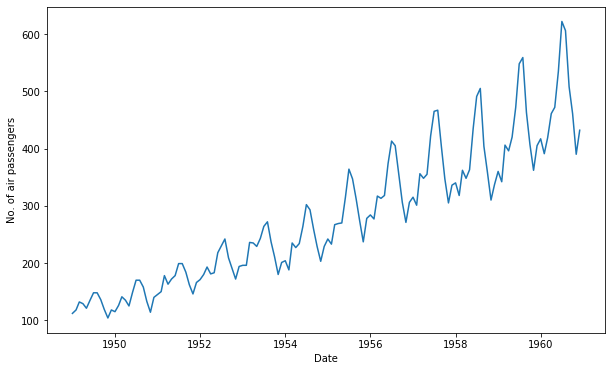

In [44]:
# Plot a Graph
plt.xlabel("Date")
plt.ylabel("No. of air passengers")
plt.plot(indexedDataset)

In [45]:
#here we will use the two est which are used to check the stationarity of data

#Determining Rolling Statistics
rolmean = indexedDataset.rolling(window=12).mean() # to find mean ,window=12 denotes a time period of 12 months or a year

rolstd = indexedDataset.rolling(window=12).std() # to find std deviation ,window=12 denotes a time period of 12 months or a year
print(rolmean,rolstd)


            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

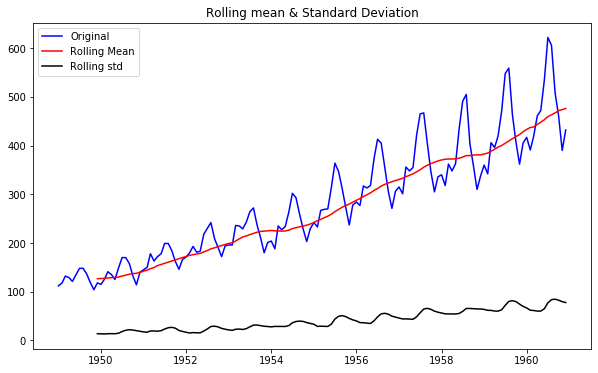

In [46]:
#plotting rolling statics
orig = plt.plot(indexedDataset,color='blue',label='Original')
mean = plt.plot(rolmean, color = 'red',label='Rolling Mean')
std = plt.plot(rolstd, color= 'black', label ='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & Standard Deviation')
plt.show(block= False)

In [47]:
# Apply ADFuller test

from statsmodels.tsa.stattools import adfuller

print("Results of dickey fuller test: ")
dftest = adfuller(indexedDataset['#Passengers'],autolag ='AIC') # AIC will give waht you wanted in timeseries ,exact value or actual values, and it analyzes differnce between them

dfoutput = pd.Series(dftest[0:4],index=['Test Statistic', 'p-value','#lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['CriticalValue (%s)'%key] = value
    
print (dfoutput)

Results of dickey fuller test: 
Test Statistic                   0.815369
p-value                          0.991880
#lags Used                      13.000000
Number of Observations Used    130.000000
CriticalValue (1%)              -3.481682
CriticalValue (5%)              -2.884042
CriticalValue (10%)             -2.578770
dtype: float64


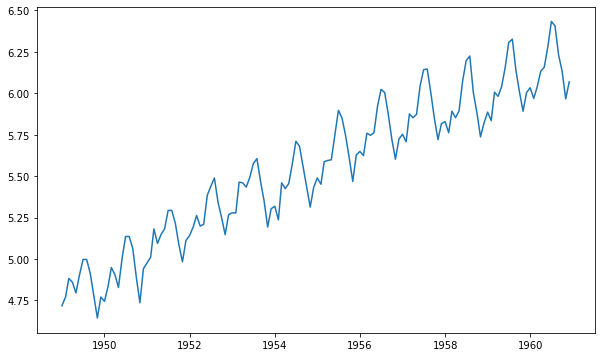

In [48]:
# estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

#here you can see that tyrend is same but values on Y-axis are changed

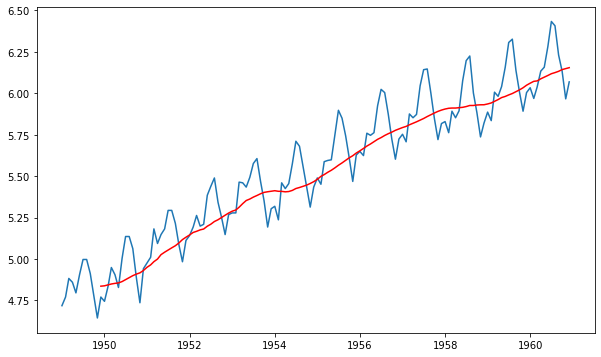

In [49]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

#by visualization we can conclude that mean is not stationary,because it is moving with the time and this is again upward trend

In [50]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale- movingAverage
datasetLogScaleMinusMovingAverage.head(2)

# Remove Nan (Not a number) value
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [51]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plotting rolling statics
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(movingAverage, color = 'red',label='Rolling Mean')
    std = plt.plot(movingSTD, color= 'black', label ='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard Deviation')
    plt.show(block= False)
    
    print("Results of dickey fuller test: ")
    dftest = adfuller(timeseries['#Passengers'],autolag ='AIC') # AIC will give waht you wanted in timeseries ,exact value or actual values, and it analyzes differnce between them

    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic', 'p-value','#lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['CriticalValue (%s)'%key] = value
    print(dfoutput)

    
    

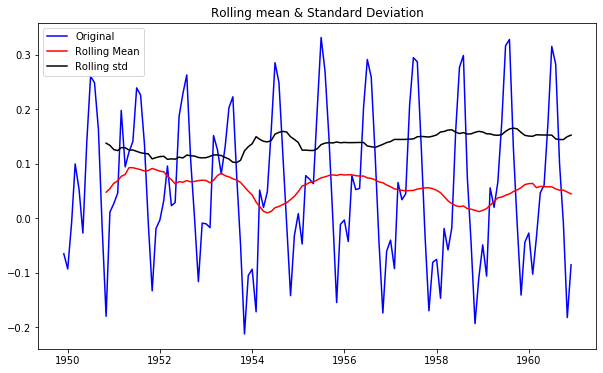

Results of dickey fuller test: 
Test Statistic                  -3.162908
p-value                          0.022235
#lags Used                      13.000000
Number of Observations Used    119.000000
CriticalValue (1%)              -3.486535
CriticalValue (5%)              -2.886151
CriticalValue (10%)             -2.579896
dtype: float64


In [52]:
test_stationarity(datasetLogScaleMinusMovingAverage)

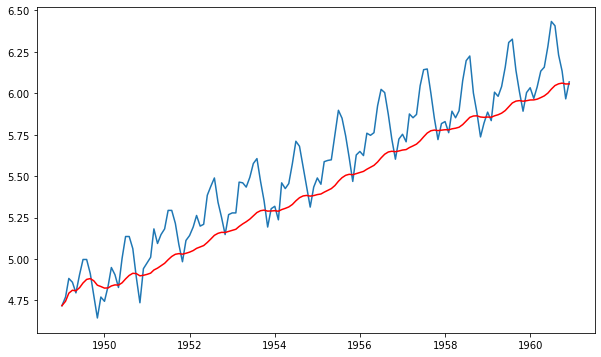

In [53]:
#to calculate weighted average of timeseries because we need to see the trend in timeseries

exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')
    


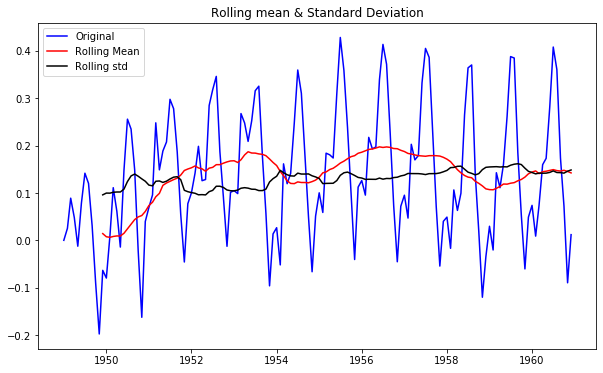

Results of dickey fuller test: 
Test Statistic                  -3.601262
p-value                          0.005737
#lags Used                      13.000000
Number of Observations Used    130.000000
CriticalValue (1%)              -3.481682
CriticalValue (5%)              -2.884042
CriticalValue (10%)             -2.578770
dtype: float64


In [54]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage 
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

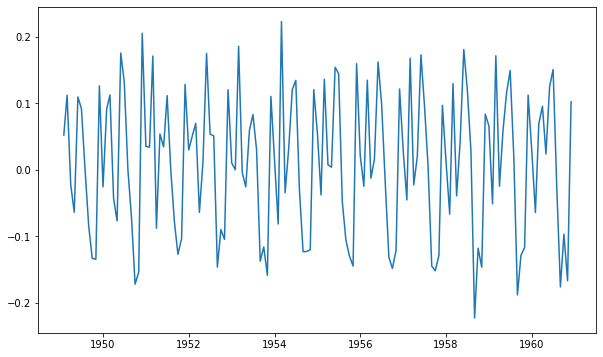

In [55]:
#now we know that data is stationary , now we will shift the values into timeseries so that we can use int the forcasting . To shift we will use'shift()'

datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)


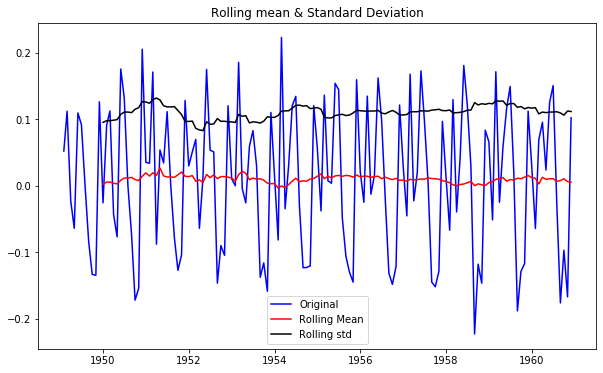

Results of dickey fuller test: 
Test Statistic                  -2.717131
p-value                          0.071121
#lags Used                      14.000000
Number of Observations Used    128.000000
CriticalValue (1%)              -3.482501
CriticalValue (5%)              -2.884398
CriticalValue (10%)             -2.578960
dtype: float64


In [56]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)


# null hypothesis is rejected and hence we can say that time series is stationary now

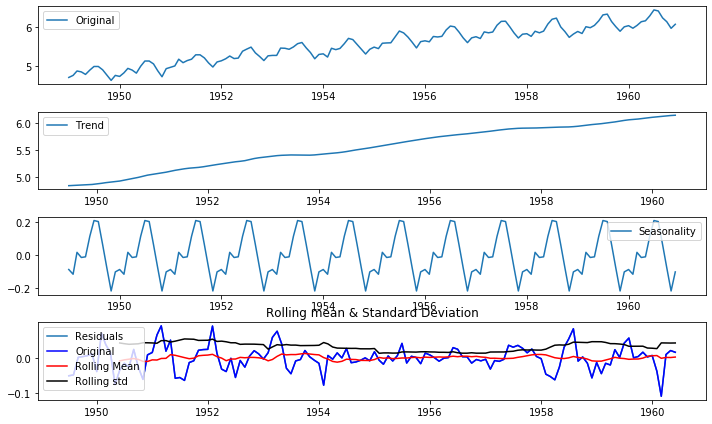

Results of dickey fuller test: 
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
CriticalValue (1%)            -3.485122e+00
CriticalValue (5%)            -2.885538e+00
CriticalValue (10%)           -2.579569e+00
dtype: float64


In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal= decomposition.seasonal
residual =decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend (loc='best')
plt.subplot(412)
plt.plot (trend, label= 'Trend' )
plt.legend(loc= 'best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot (414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

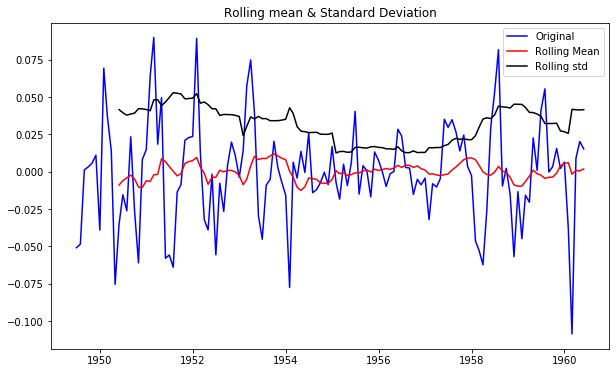

Results of dickey fuller test: 
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
CriticalValue (1%)            -3.485122e+00
CriticalValue (5%)            -2.885538e+00
CriticalValue (10%)           -2.579569e+00
dtype: float64


In [66]:
decomposedLogData = residual 
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

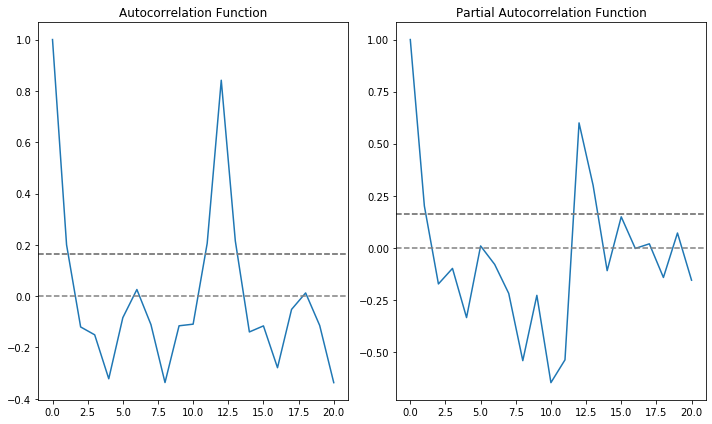

In [73]:
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#PLot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color= 'gray')
plt.axhline(y=1.96/np.sqrt(len (datasetLogDiffShifting)), linestyle='--' , color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#PLot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color= 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--' ,color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--' , color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\adity\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\adity\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


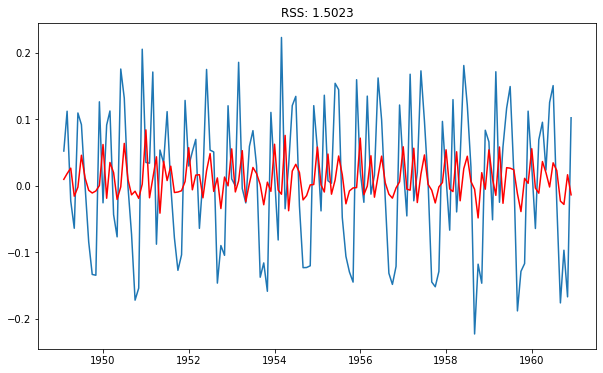

In [92]:
from statsmodels.tsa.arima_model import ARIMA

#AR model 
model = ARIMA(indexedDataset_logScale,order = (2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2)) # RSS-> residual sum of squares
print('Plotting AR model')

c:\users\adity\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\adity\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


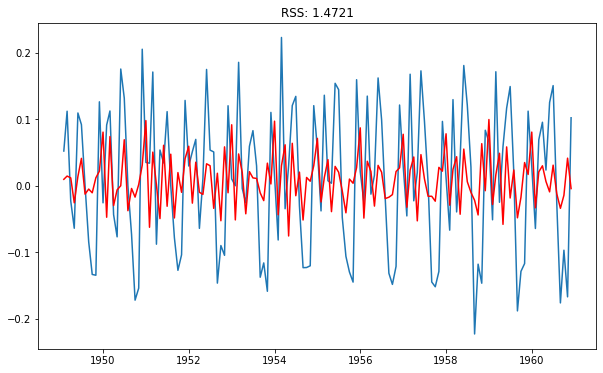

In [93]:
#MA model (Moving Avg) 
model = ARIMA(indexedDataset_logScale,order = (0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2)) # RSS-> residual sum of squares
print('Plotting MA model')

c:\users\adity\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\adity\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


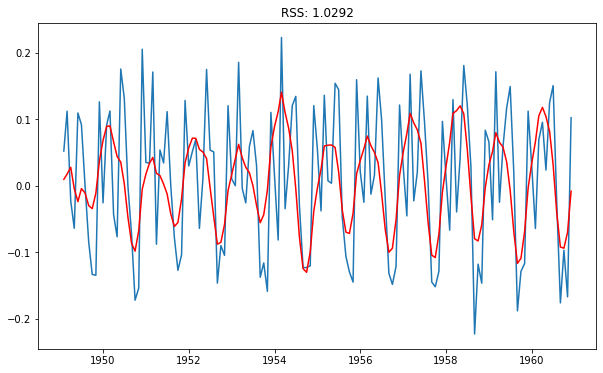

In [95]:
model = ARIMA(indexedDataset_logScale,order = (2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2)) # RSS-> residual sum of squares
print('Plotting ARIMA model')

In [96]:
predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())


Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [97]:
#lets convert it to cumulative sum 
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [100]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale["#Passengers"].ix[0],index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

c:\users\adity\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

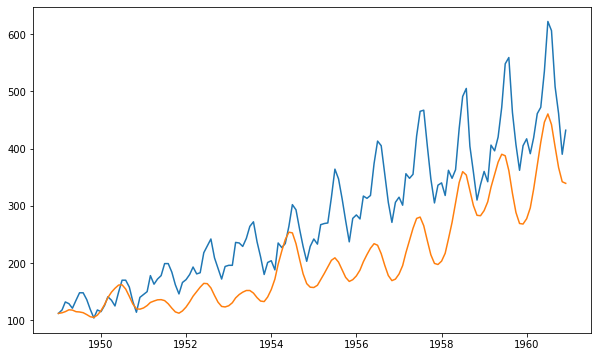

In [101]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [102]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


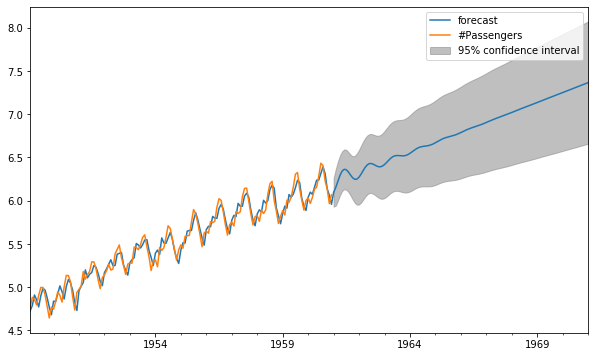

In [108]:
results_ARIMA.plot_predict(1,264) #2params are(1.index of timeseries ,2.no. of datapoints you want the timeseries for) lets predict for next 10 yrs 264 = (12months*10yrs =120)+144 rows 



In [110]:
results_ARIMA.forecast(steps=120)

(array([6.09553392, 6.15281402, 6.22442963, 6.29241097, 6.3416471 ,
        6.36359354, 6.35784678, 6.33139297, 6.29597534, 6.26447708,
        6.2473832 , 6.25025166, 6.27275829, 6.30940304, 6.35151484,
        6.38988645, 6.4172737 , 6.43011043, 6.42906678, 6.41842478,
        6.40456144, 6.39403604, 6.39183071, 6.40019491, 6.41833679,
        6.44295394, 6.46937421, 6.49293972, 6.51024104, 6.51989018,
        6.52267563, 6.52112372, 6.51864511, 6.51853673, 6.52311906,
        6.53322343, 6.54812852, 6.5659154 , 6.58410291, 6.60036521,
        6.61313247, 6.62192762, 6.62737769, 6.63093108, 6.63438668,
        6.63937964, 6.64696483, 6.65739819, 6.67015303, 6.68414229,
        6.69806604, 6.71077878, 6.72157709, 6.7303396 , 6.73749786,
        6.74386354, 6.75037298, 6.75782567, 6.76668656, 6.77699797,
        6.78841293, 6.80032827, 6.81207168, 6.82308733, 6.83307108,
        6.84202464, 6.85022283, 6.85811192, 6.8661731 , 6.87479121,
        6.88416272, 6.89426353, 6.90487859, 6.91

In [109]:
x=results_ARIMA.forecast(steps=120)
x[1]

array([0.08384711, 0.10749461, 0.11568694, 0.11702774, 0.11703496,
       0.11744017, 0.11762249, 0.11778712, 0.12024161, 0.12736041,
       0.13870958, 0.15118791, 0.16157812, 0.16834392, 0.17177326,
       0.17311979, 0.17358729, 0.17385456, 0.17430214, 0.17543328,
       0.17788143, 0.18195718, 0.18726213, 0.19283389, 0.19769241,
       0.20130635, 0.20369051, 0.20519828, 0.20625264, 0.20720994,
       0.20836966, 0.21000321, 0.21229739, 0.21524473, 0.21860174,
       0.22198251, 0.22503059, 0.22755289, 0.22954801, 0.23114792,
       0.23253819, 0.23390528, 0.23541303, 0.23718305, 0.23926531,
       0.24161531, 0.24410364, 0.2465635 , 0.24885249, 0.25089622,
       0.25269726, 0.2543162 , 0.25584304, 0.2573722 , 0.25898382,
       0.26072841, 0.26261539, 0.26461081, 0.2666489 , 0.26865472,
       0.2705684 , 0.27236088, 0.27403692, 0.27562765, 0.2771782 ,
       0.27873517, 0.28033582, 0.28200008, 0.28372672, 0.285495  ,
       0.287272  , 0.28902335, 0.29072327, 0.29236073, 0.29394

In [105]:
len(x[1])


120

In [106]:
np.exp(x[1])

array([1.08746262, 1.11348486, 1.12264436, 1.12415061, 1.12415872,
       1.12461434, 1.1248194 , 1.1250046 , 1.1277693 , 1.1358263 ,
       1.14879042, 1.16321521, 1.17536427, 1.18334352, 1.18740857,
       1.18900853, 1.18956452, 1.18988249, 1.19041518, 1.19176247,
       1.19468366, 1.19956283, 1.20594336, 1.21268134, 1.21858751,
       1.22299938, 1.22591869, 1.22776848, 1.22906368, 1.23024082,
       1.23166838, 1.23368202, 1.23651555, 1.24016536, 1.2443356 ,
       1.24854954, 1.25236102, 1.25552384, 1.25803126, 1.26004561,
       1.26179863, 1.2635248 , 1.26543133, 1.26767314, 1.27031552,
       1.27330427, 1.27647662, 1.27962043, 1.28255283, 1.2851767 ,
       1.28749344, 1.28957951, 1.29154999, 1.29352649, 1.29561284,
       1.29787513, 1.30032651, 1.30292379, 1.30558197, 1.30820337,
       1.31070924, 1.31306077, 1.31526336, 1.31735725, 1.31940147,
       1.32145734, 1.32357421, 1.32577883, 1.32806995, 1.33042042,
       1.33278669, 1.3351229 , 1.33739443, 1.33958615, 1.34170